# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 4: Badanie relacji między punktami (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [5]:
def point_count_on_subregions(points, bins, x_lim, y_lim):

    X = np.linspace(x_lim[0],x_lim[-1],bins[0]+1)
    Y = np.linspace(y_lim[0],y_lim[-1],bins[-1]+1)
    P,X,Y = np.histogram2d(points["X"],points["Y"],bins=(X,Y))
    #zwraca transponowane P bo współrzedne są inaczej 
    return [P.T,X,Y]

### Wczytanie danych
Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_HP` - jednorodny rozkład Poissona,
 - `points_R` - rozkład regularny z komponentem losowym,
 - `points_M` - rozkład Materna,

wygenerowane dla zakresu współrzędnych X $[10, 20]$ i Y $[-20, -10]$.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
points_HP = pd.read_pickle('points_HP.pkl')
points_R = pd.read_pickle('points_R.pkl')
points_M = pd.read_pickle('points_M.pkl')

### Zadanie 1: Wykres Morishity (12 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `morishita_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Morishity. 

Algorytm postępowania:
- Kolejno dzielimy obszar na rosnącą liczbę kwadratowych podobszarów.
- Dla każdego z podziałów obliczamy wartość indeksu: <br/>
$MI = L \sum_{i=1}^L \frac{n_i (n_i-1)}{N(N-1)}$ <br/>
gdzie: $L$ - liczba podobszarów, $N$ - liczba punktów, $n_i$ - liczba punktów w obrębie i-tego podobszaru.
- Zestawiamy w tabeli długości boków podobszarów w poszczególnych podziałach z obliczonymi dla nich wartościami indeksu $MI$.

Uwagi do wykonania zadania:
- W części zadania dotyczącej podziału obszaru analizy na podobszary i zliczenia znajdujących się w nich punktów nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `point_count_on_subregions()`, którą można wkleić we wskazanej komórce na początku notatnika.

In [13]:
def morishita_plot_data(points, bins_list, x_lim, y_lim):
    BD=[]
    MI = []
    for bins in bins_list:
        points_count, x, y = point_count_on_subregions(points, bins, x_lim, y_lim)
        mi = (points_count*(points_count-1)).sum()*bins[0]*bins[1]/(points_count.sum()*(points_count.sum()-1))
        bd = x[1]-x[0]
        MI.append(mi)
        BD.append(bd)
    df=pd.DataFrame ({"BD":BD,"MI":MI})
    return df

In [14]:
# Komórka testowa
test_results_1 = morishita_plot_data(points_HP, bins_list=[[2, 2], [5, 5], [13, 13], [20, 20]], x_lim=[10, 15], y_lim=[-20, -15])
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (4, 2)
assert list(test_results_1.columns) == ["BD", "MI"]
assert np.all(np.isclose(test_results_1["BD"].values, np.array([2.5       , 1.        , 0.38461538, 0.25      ])))
assert np.all(np.isclose(test_results_1["MI"].values, np.array([0.98189135, 0.86519115, 0.68008048, 1.44869215])))

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich wczytanych do notatnika rozkładów punktowych. Wykonaj obliczenia dla całego obszaru, na którym zostały wygenerowane punkty podzielonego na 2x2, 3x3, ..., 40x40 podobszarów w poziomie i w pionie.

Przedstaw wyniki analizy graficznie w postaci wykresów punktowych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym, a wykresy Morishity w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów Morishity.

<Axes: title={'center': 'Morishita for M'}, xlabel='X', ylabel='Y'>

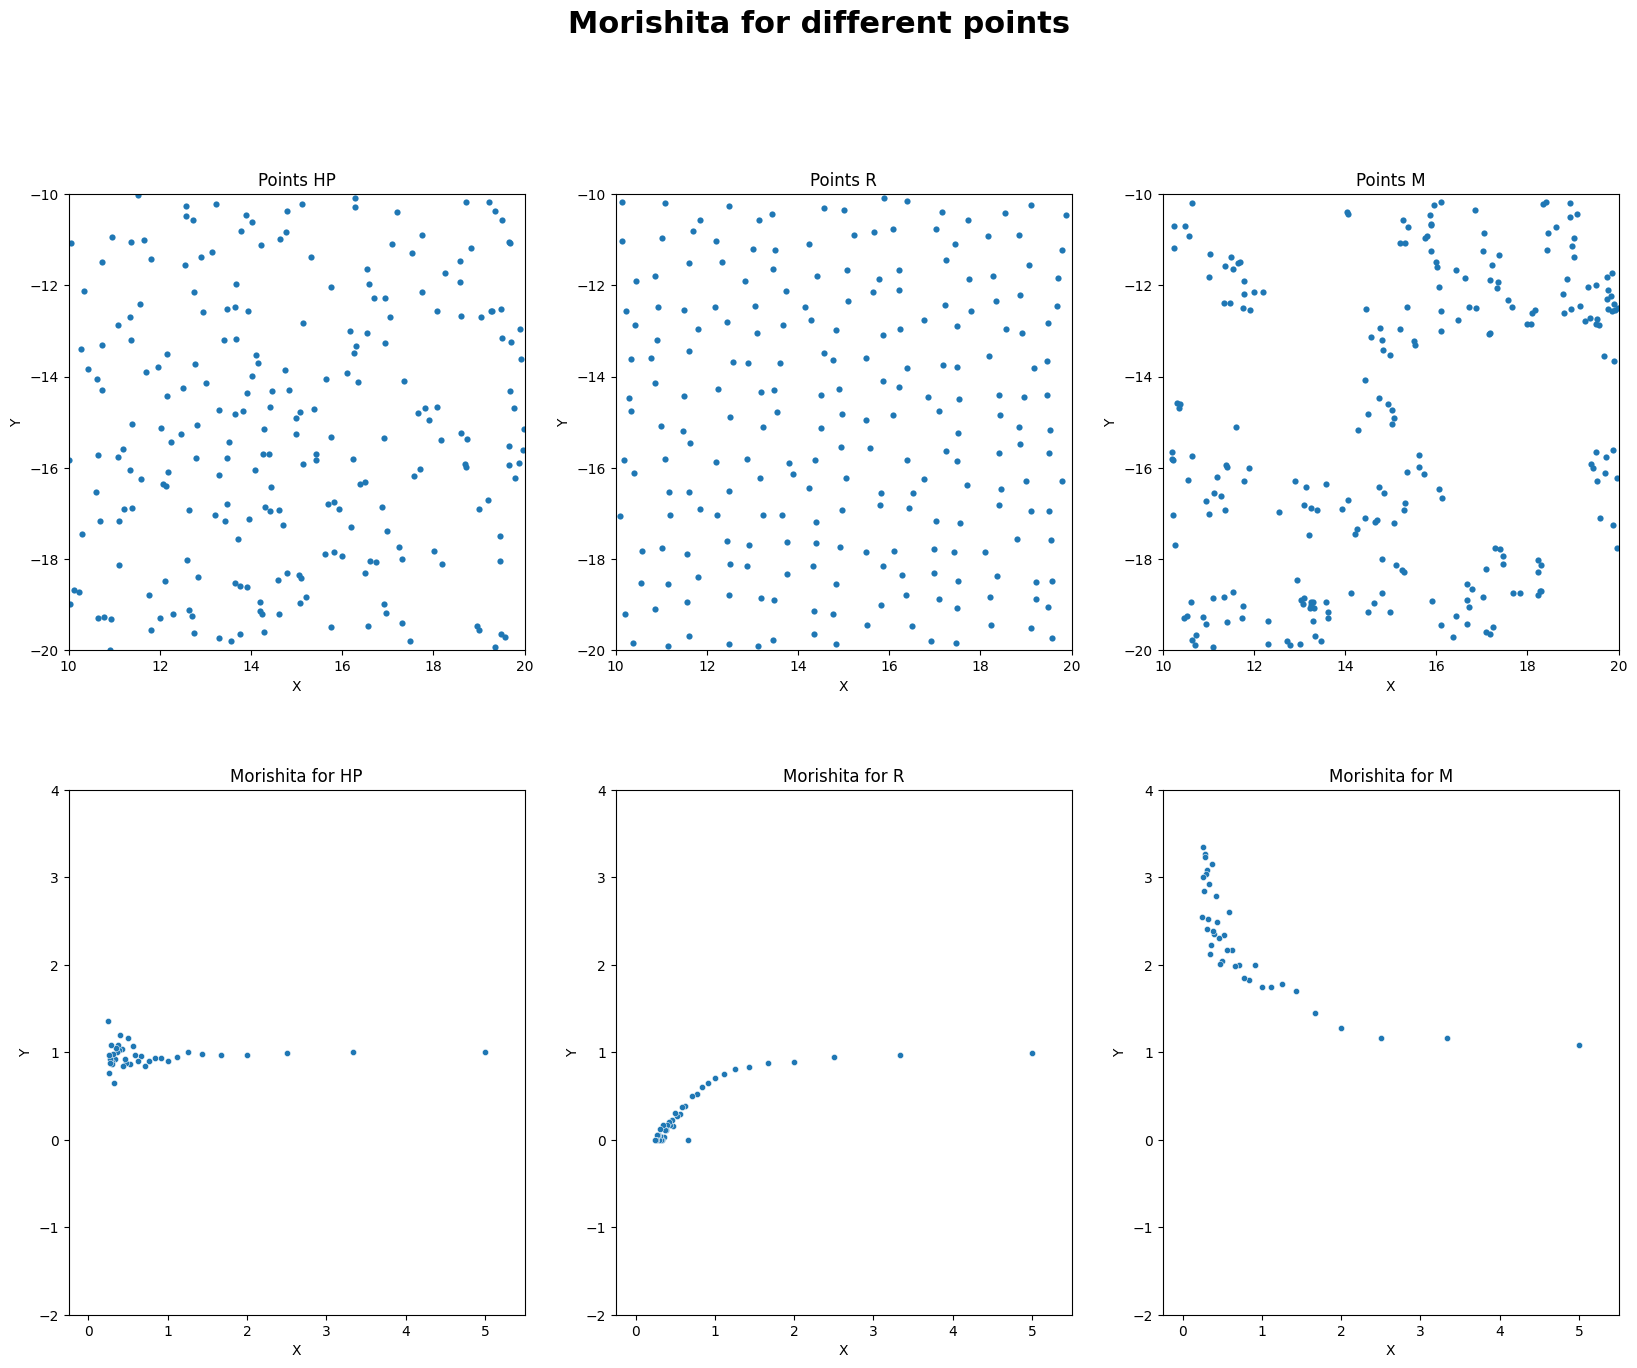

In [51]:
bins_list = [[bins,bins] for bins in range(2,41)]
x_lim=[10,20]
y_lim=[-20,-10]
morishita_points_HP = morishita_plot_data(points_HP, bins_list, x_lim, y_lim)
morishita_points_R = morishita_plot_data(points_R, bins_list, x_lim, y_lim)
morishita_points_M = morishita_plot_data(points_M, bins_list, x_lim, y_lim)


figure,axes = plt.subplots(2,3,figsize=(20,15))
figure.suptitle(t="Morishita for different points", size = 22, weight = "bold")

axes[0,0].axis("square")
axes[0,0].set_title("Points HP")
axes[0,0].set_xlim(x_lim[0],x_lim[1])
axes[0,0].set_ylim(y_lim[0],y_lim[1])
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")
sns.scatterplot(data=points_HP, x="X", y="Y", ax=axes[0,0], s=20, linewidth=0)

axes[1,0].set_title("Morishita for HP")
axes[1,0].set_xlim(morishita_points_HP["BD"].min()-0.5 ,morishita_points_HP["BD"].max()+0.5)
axes[1,0].set_ylim(-2,4)
axes[1,0].set_xlabel("X")
axes[1,0].set_ylabel("Y")
sns.scatterplot(data=morishita_points_HP, x="BD", y="MI", ax=axes[1,0], s=20)

axes[0,1].axis("square")
axes[0,1].set_title("Points R")
axes[0,1].set_xlim(x_lim[0],x_lim[1])
axes[0,1].set_ylim(y_lim[0],y_lim[1])
axes[0,1].set_xlabel("X")
axes[0,1].set_ylabel("Y")
sns.scatterplot(data=points_R, x="X", y="Y", ax=axes[0,1], s=20, linewidth=0)

axes[1,1].set_title("Morishita for R")
axes[1,1].set_xlim(morishita_points_R["BD"].min()-0.5,morishita_points_R["BD"].max()+0.5)
axes[1,1].set_ylim(-2,4)
axes[1,1].set_xlabel("X")
axes[1,1].set_ylabel("Y")
sns.scatterplot(data=morishita_points_R, x="BD", y="MI", ax=axes[1,1], s=20)

axes[0,2].axis("square")
axes[0,2].set_title("Points M")
axes[0,2].set_xlim(x_lim[0],x_lim[1])
axes[0,2].set_ylim(y_lim[0],y_lim[1])
axes[0,2].set_xlabel("X")
axes[0,2].set_ylabel("Y")
sns.scatterplot(data=points_M, x="X", y="Y", ax=axes[0,2], s=20, linewidth=0)


axes[1,2].set_title("Morishita for M")
axes[1,2].set_xlim(morishita_points_M["BD"].min() -0.5,morishita_points_M["BD"].max()+0.5)
axes[1,2].set_ylim(-2,4)
axes[1,2].set_xlabel("X")
axes[1,2].set_ylabel("Y")
sns.scatterplot(data=morishita_points_M, x="BD", y="MI", ax=axes[1,2], s=20)


### Zadanie 2: Wykres Fry (12 pkt)

#### a) Przygotowanie funkcji
Przygotuj funkcję `fry_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Fry.

Algorytm postępowania: <br/>
- Traktując kolejno każdy punkt analizowanego rozkładu jako początek układu współrzędnych zapisujemy współrzędne pozostałych punktów względem niego.
Rezultatem jest zbiór współrzędnych $n(n-1)$ punktów, gdzie $n$ to liczba punktów w analizowanym rozkładzie.

In [3]:
def fry_plot_data(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    fry_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    fry_points = points-points.iloc[0]
    fry_points = fry_points[(fry_points["X"]!=0) & (fry_points["Y"]!=0)]
    for idx,point in points.iterrows():
        if idx>0:
            fry_points = pd.concat([fry_points, points-point], axis=0)
            fry_points = fry_points[(fry_points["X"]!=0) & (fry_points["Y"]!=0)]
    return fry_points

In [27]:
# Komórka testowa
test_results_2 = fry_plot_data(points_R)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (50400, 2)
assert list(test_results_2.columns) == ["X", "Y"]
assert np.isclose(test_results_2["X"].min(), -9.780351083790674)
assert np.isclose(test_results_2["X"].max(), 9.780351083790674)
assert np.isclose(test_results_2["Y"].min(), -9.820917153357763)
assert np.isclose(test_results_2["Y"].max(), 9.820917153357763)
assert np.isclose(np.min(np.sqrt(test_results_2["X"]**2 + test_results_2["Y"]**2)), 0.2422502497911993)
assert np.isclose(np.max(np.sqrt(test_results_2["X"]**2 + test_results_2["Y"]**2)), 13.427014041427164)
assert np.isclose(np.mean(np.sqrt(test_results_2["X"]**2 + test_results_2["Y"]**2)), 5.2279202259517525)

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich wczytanych do notatnika rozkładów punktowych.

Przedstaw wyniki analizy graficznie w postaci wykresów punktowych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym, a wykresy Fry w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów Fry oraz dobierz rozmiar i przeźroczystość punktów tak, aby wykresy dobrze oddawały charakter rozkładu, którego dotyczą.

<Axes: xlabel='X', ylabel='Y'>

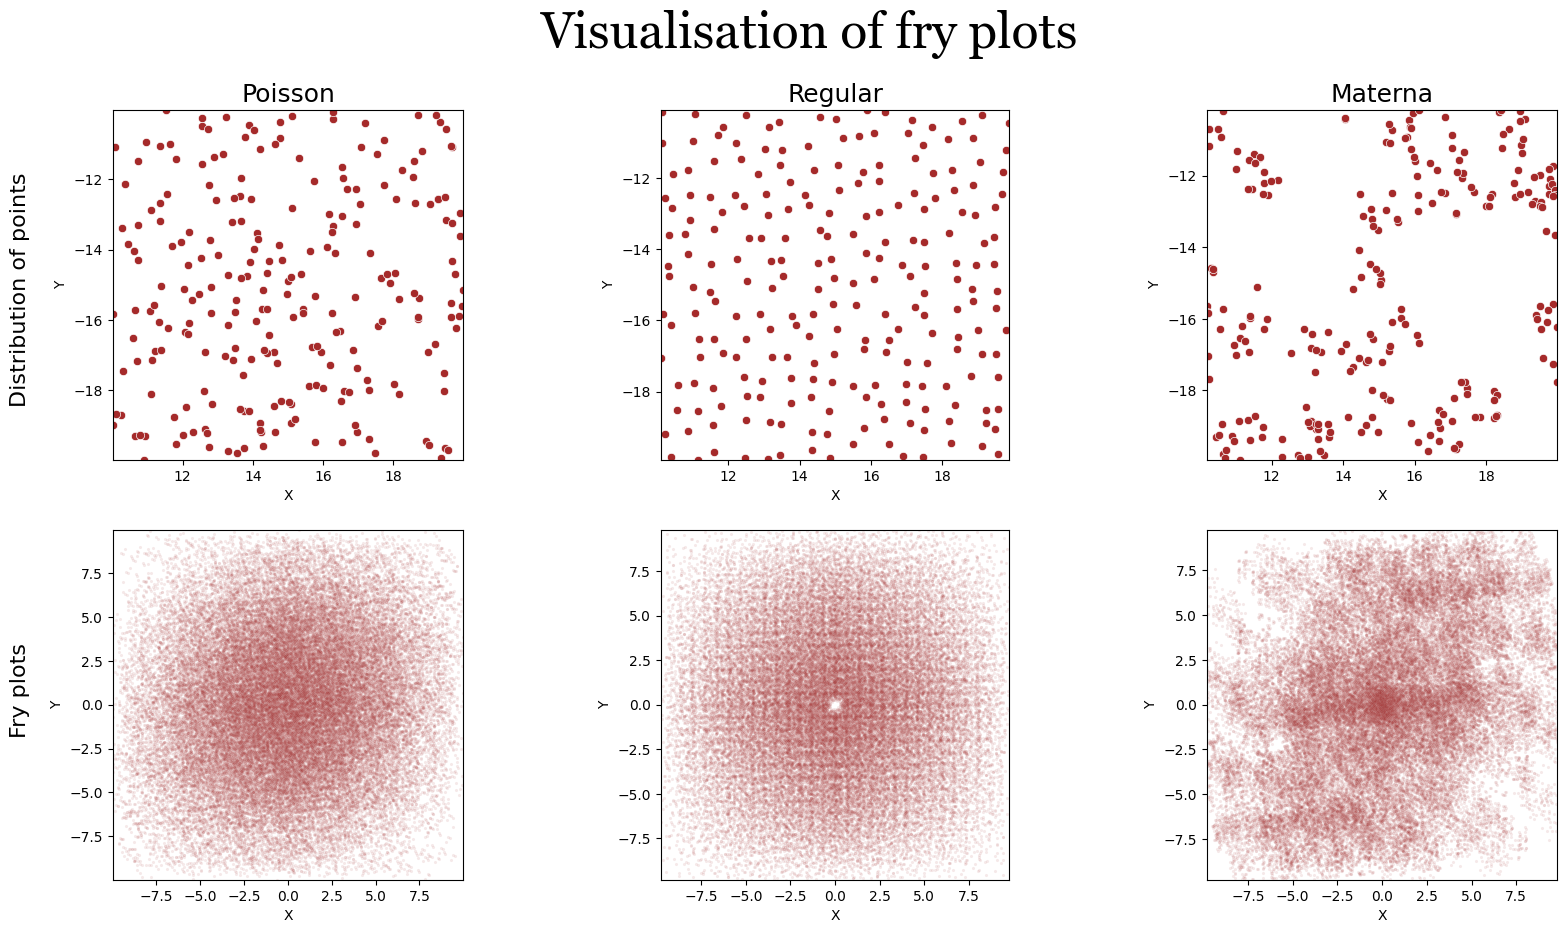

In [61]:
fry_points_HP = fry_plot_data(points_HP)
fry_points_R = fry_plot_data(points_R)
fry_points_M = fry_plot_data(points_M)

fig,ax = plt.subplots(2,3,figsize=(20,10))
fig.suptitle("Visualisation of fry plots", fontsize = 36, fontfamily="Georgia")
fig.text(0.1, 0.7, 'Distribution of points', va='center', rotation='vertical', fontsize=16)
fig.text(0.1, 0.3, 'Fry plots', va='center', rotation='vertical', fontsize=16)

# Point plots=================================================
ax[0,0].axis("square")
ax[0,0].set_xlim(np.min(points_HP["X"]),np.max(points_HP["X"]))
ax[0,0].set_ylim(np.min(points_HP["Y"]),np.max(points_HP["Y"]))
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")
ax[0,0].set_title("Poisson", fontsize=18)
sns.scatterplot(data=points_HP,x="X", y="Y",ax=ax[0,0], color = "brown")

ax[0,1].axis("square")
ax[0,1].set_xlim(np.min(points_R["X"]),np.max(points_R["X"]))
ax[0,1].set_ylim(np.min(points_R["Y"]),np.max(points_R["Y"]))
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")
ax[0,1].set_title("Regular", fontsize=18)
sns.scatterplot(data=points_R,x="X", y="Y",ax=ax[0,1], color = "brown")

ax[0,2].axis("square")
ax[0,2].set_xlim(np.min(points_M["X"]),np.max(points_M["X"]))
ax[0,2].set_ylim(np.min(points_M["Y"]),np.max(points_M["Y"]))
ax[0,2].set_xlabel("X")
ax[0,2].set_ylabel("Y")
ax[0,2].set_title("Materna", fontsize=18)
sns.scatterplot(data=points_M,x="X", y="Y",ax=ax[0,2], color = "brown")

#Fry plots============================================================
ax[1,0].axis("square")
ax[1,0].set_xlim(np.min(fry_points_HP["X"]),np.max(fry_points_HP["X"]))
ax[1,0].set_ylim(np.min(fry_points_HP["Y"]),np.max(fry_points_HP["Y"]))
ax[1,0].set_xlabel("X")
ax[1,0].set_ylabel("Y")
sns.scatterplot(data=fry_points_HP,x="X", y="Y",ax=ax[1,0],alpha = 0.1, s=5, color = "brown")


ax[1,1].axis("square")
ax[1,1].set_xlim(np.min(fry_points_R["X"]),np.max(fry_points_R["X"]))
ax[1,1].set_ylim(np.min(fry_points_R["Y"]),np.max(fry_points_R["Y"]))
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("Y")
sns.scatterplot(data=fry_points_R,x="X", y="Y",ax=ax[1,1], alpha = 0.1, s=5, color = "brown")

ax[1,2].axis("square")
ax[1,2].set_xlim(np.min(fry_points_M["X"]),np.max(fry_points_M["X"]))
ax[1,2].set_ylim(np.min(fry_points_M["Y"]),np.max(fry_points_M["Y"]))
ax[1,2].set_xlabel("X")
ax[1,2].set_ylabel("Y")
sns.scatterplot(data=fry_points_M,x="X", y="Y",ax=ax[1,2], s=5, alpha = 0.1, color = "brown")